# Udacity Data Scientist Nano degree - DS Blog

### Insights from sales data of Walmart

In this Project I will do some Exploratory Data analysis sales data of Walmart.There are three questions we are going to answer. Explanation and visualization will be presented in order to answer each question.

The dataset can be download using this [link](https://www.kaggle.com/c/m5-forecasting-accuracy/data)

### Questions

* What is the statistical distribution of the selling price for all the stores?
* What is the distribution of sell price over the year for all the stores?
* What is the distribution of selling price over the month for all the stores?

### Data Acquisition & Preparation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/m5-forecasting-accuracy/sell_prices.csv
/kaggle/input/m5-forecasting-accuracy/sample_submission.csv
/kaggle/input/m5-forecasting-accuracy/calendar.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.gcf().set_size_inches(20, 10)
import tensorflow as tf
import numpy as np

for lib in [tf,sns,np]:
    print(lib.__name__, lib.__version__)
%matplotlib inline

tensorflow 2.1.0
seaborn 0.10.0
numpy 1.18.1


In [3]:
data = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
data.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [4]:
calender = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/calendar.csv')
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
data.dtypes

store_id       object
item_id        object
wm_yr_wk        int64
sell_price    float64
dtype: object

In [ ]:
data = pd.merge(data,calender,on='wm_yr_wk')
data.head()

### Data understanding
The dataset consist of two part:
1. sell_prices.csv - Contains information about the price of the products sold per store and date.
2. calendar.csv - Contains information about the dates on which the products are sold.

we need to merge both the dataset so, that the we have complete information of the items sold. We need to check if *sell_price* has null values or not so that the missing values can be handled and aggregation task can be performed 

## Data Exploration

### 1. What is the statistical distribution of the selling price for all the stores?

In [7]:
data_stats = data.describe().T
data_stats.reset_index(inplace=True)
data_stats.rename({'index':'fields'},axis=1,inplace=True)
data_stats

,fields,count,mean,std,min,25%,50%,75%,max
0,wm_yr_wk,47735397.0,11382.183154,148.235972,11101.00,11246.00,11410.00,11517.00,11621.00
1,sell_price,47735397.0,4.410726,3.408416,0.01,2.18,3.47,5.84,107.32
2,wday,47735397.0,3.996806,2.000796,1.00,2.00,4.00,6.00,7.00
3,month,47735397.0,6.356977,3.426331,1.00,3.00,6.00,9.00,12.00
4,year,47735397.0,2013.639931,1.514132,2011.00,2012.00,2014.00,2015.00,2016.00
5,snap_CA,47735397.0,0.329397,0.469994,0.00,0.00,0.00,1.00,1.00
6,snap_TX,47735397.0,0.329807,0.470143,0.00,0.00,0.00,1.00,1.00
7,snap_WI,47735397.0,0.329845,0.470157,0.00,0.00,0.00,1.00,1.00


### % of null values

In [8]:
data.isna().sum()/data.count() * 100

store_id            0.000000
item_id             0.000000
wm_yr_wk            0.000000
sell_price          0.000000
date                0.000000
weekday             0.000000
wday                0.000000
month               0.000000
year                0.000000
d                   0.000000
event_name_1     1114.545341
event_type_1     1114.545341
event_name_2    38096.568059
event_type_2    38096.568059
snap_CA             0.000000
snap_TX             0.000000
snap_WI             0.000000
dtype: float64

so we can see that *sell_price* doesn't contain null values, we can proceed with our visualization part.

To find out the statistical distribution I will try to plot the Box-plot for each store on the selling price. Box-plot is suitable for finding out the median and lower bound and upper bound selling price. It is also suitable in figuring out the outliers(Extreme selling price) for each store.

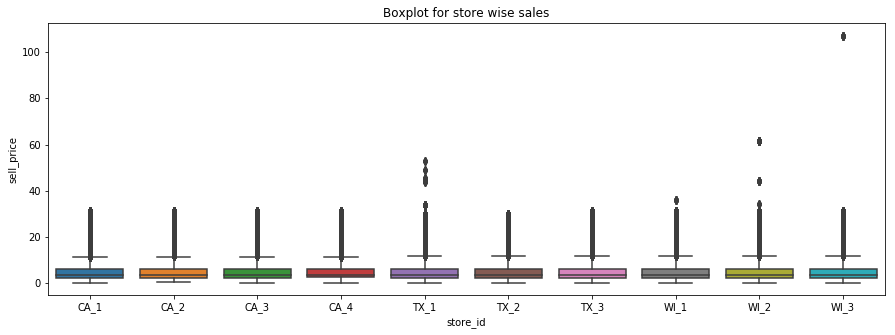

In [10]:
# Visualize the data
plt.figure(figsize=(15,5))
plt.title('Boxplot for store wise sales')
sns.boxplot(x='store_id',y='sell_price',data=data)

The data describes that the overall selling price for all the stores lies within the range 2–3 dollars. store WI_3 has some extraordinary selling patterns than other stores.

### 2. What is the distribution of sell price over the year for all the stores?

To find out the distribution of the selling price of the Stores I will try to plot the Histogram. This type of plot will give an idea for the varying sales patten over the year.

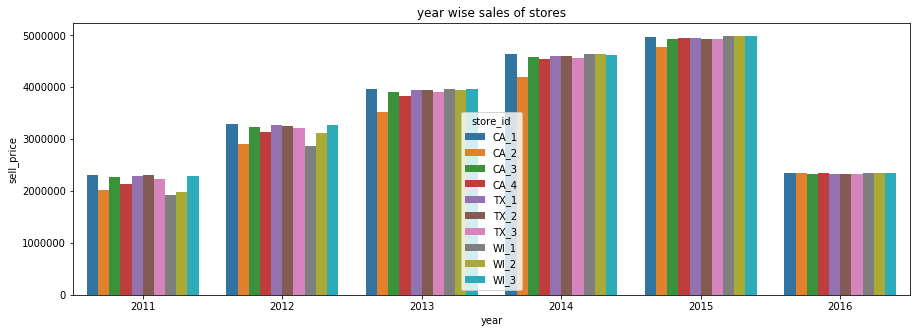

In [11]:
year_sell_price = pd.DataFrame(data.groupby(['year','store_id'])['sell_price'].sum().reset_index())
plt.figure(figsize=(15,5))
plt.title('Year wise sales of stores')
sns.barplot(x='year',y='sell_price',data=year_sell_price,hue='store_id')

As it is evident from the sales plot that **2015** is the most profitable selling year. The sales drastically decreased in the year 2016. The sales plot shows an increasing pattern from 2011 to 2015, for all the stores.

### 3. What is the distribution of selling price over the month for all the stores?

To find out the distribution of the selling price of the Stores I will try to plot the Histogram. This type of plot will give an idea for the varying sales patten over the Month.

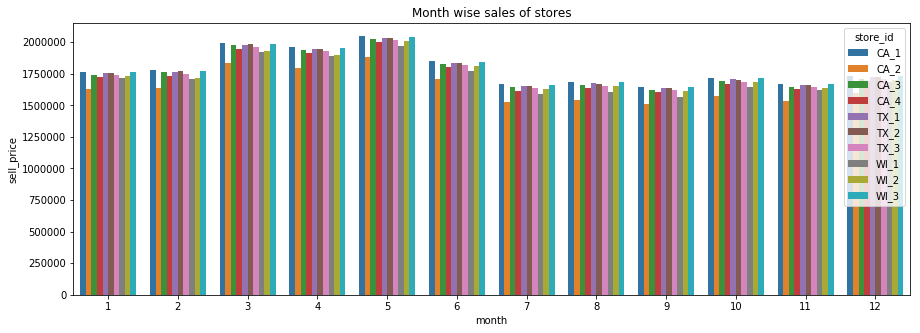

In [13]:
month_sell_price = pd.DataFrame(data.groupby(['month','store_id'])['sell_price'].sum().reset_index())
plt.figure(figsize=(15,5))
plt.title('Month wise sales of stores')
sns.barplot(x='month',y='sell_price',hue='store_id',data=month_sell_price,estimator=np.sum)

So we can say that the sales pattern is increasing in the initial half of the year. In May month the sales are at their peak for every store. The later half of the Year the sales are didn’t vary much. **CA_1** store has always outperformed the sales than other stores.

# Conclusion

* We found out that most of the items sold lie within 2–3 dollars for all the stores. One Store show sales of some abrupt costly items.
* 2015 was the most profitable year for all the stores because of the sales were at its peak.
* In the month of May, the sales are at their peak, and the sales remain considerably the same in the second half of the year.